### MODELS
- DT
- RF
- MLP model





# **BI-CLASSIFIER MODELS FOR STROKE**
First thing, is to import all the libraries needed for the operations on the dataset like pandas, numpy, matplotlib and files.
Then, we upload the dataset.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from google.colab import files
uploaded = files.upload()

Saving Dataset1.csv to Dataset1.csv


Read dataset

In [ ]:
#DATA PREPROCESSING

df = pd.read_csv('Dataset1.csv')

### PREPROCESAMIENTO - diabetes

In [ ]:
# Diabetes values are 0,1,2. If value == 1or2 then value = 1
df['Diabetes'] = df['Diabetes'].apply(lambda x: 1 if x in [1, 2] else 0)

# average of diabetes for each age category
age_target_encoding = df.groupby('Age')['Diabetes'].mean()
# Mape values
df['Age'] = df['Age'].map(age_target_encoding)
df.dropna(inplace=True)

#BMI normalize
from sklearn.preprocessing import MinMaxScaler
standard = MinMaxScaler()
df['BMI'] = standard.fit_transform(df[['BMI']])

#Ment and Phys Hlth normalize
df['MentHlth'] = standard.fit_transform(df[['MentHlth']])
df['PhysHlth'] = standard.fit_transform(df[['PhysHlth']])

print(f"Dataset: {df.shape}")
df.head()

#feature selection - DIABETES
selected_features = ['HighBP', 'HighChol', 'BMI', 'Smoker', 'PhysActivity','Fruits','Veggies','HvyAlcoholConsump', 'PhysHlth', 'Sex', 'Age']

# show
print(selected_features)
x = df[selected_features]
y = df['Diabetes']

x.head()
print("target features size ",y.shape)

#balance
target = 'Diabetes'

##null data
missing_count= df.isnull().sum()
print(missing_count) #it doesn't have null values

Dataset: (253680, 22)
['HighBP', 'HighChol', 'BMI', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'PhysHlth', 'Sex', 'Age']
target features size  (253680,)
HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


### PREPROCESSING- HEART DISEASE

In [ ]:


# average of HD for each age category
age_target_encoding = df.groupby('Age')['HeartDiseaseorAttack'].mean()
# Mape values
df['Age'] = df['Age'].map(age_target_encoding)
df.dropna(inplace=True)

#BMI normalize
from sklearn.preprocessing import MinMaxScaler
standard = MinMaxScaler()
df['BMI'] = standard.fit_transform(df[['BMI']])

#Ment and Phys Hlth normalize
df['MentHlth'] = standard.fit_transform(df[['MentHlth']])
df['PhysHlth'] = standard.fit_transform(df[['PhysHlth']])

print(f"Dataset: {df.shape}")
df.head()

#feature selection - DIABETES
selected_features = ['HighBP', 'HighChol', 'BMI', 'Smoker', 'PhysActivity','Fruits','Veggies','HvyAlcoholConsump', 'PhysHlth', 'Sex', 'Age']

# show
print(selected_features)
x = df[selected_features]
y = df['HeartDiseaseorAttack']

x.head()
print("target features size ",y.shape)

#balance
target = 'HeartDiseaseorAttack'

Dataset: (253680, 22)
['HighBP', 'HighChol', 'BMI', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'PhysHlth', 'Sex', 'Age']
target features size  (253680,)


### PREPROCESSING - STROKE

In [ ]:

# average of Stroke for each age category
age_target_encoding = df.groupby('Age')['Stroke'].mean()
# Mape values
df['Age'] = df['Age'].map(age_target_encoding)
df.dropna(inplace=True)

#BMI normalize
from sklearn.preprocessing import MinMaxScaler
standard = MinMaxScaler()
df['BMI'] = standard.fit_transform(df[['BMI']])

#Ment and Phys Hlth normalize
df['MentHlth'] = standard.fit_transform(df[['MentHlth']])
df['PhysHlth'] = standard.fit_transform(df[['PhysHlth']])

print(f"Dataset: {df.shape}")
df.head()

# Seleccionar features for Stroke
selected_features = ['HighBP', 'HighChol', 'BMI', 'Smoker', 'PhysActivity','Fruits','Veggies','HvyAlcoholConsump', 'PhysHlth', 'DiffWalk', 'Sex', 'Age']

# show
print(selected_features)
x = df[selected_features]
y = df['Stroke'] #todas las filas de la col. Stroke

x.head()

#balance
target= 'Stroke'

Dataset: (253680, 22)
['HighBP', 'HighChol', 'BMI', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'PhysHlth', 'DiffWalk', 'Sex', 'Age']


## TARGET FEATURE SELECTED

In [ ]:
#PROPORTIONS OF THE CLASSES
index = df.index
print(index)
#count null values
missing_count= x.isnull().sum()
print("missing values in x",missing_count)
print(f"Balance between classes of the Target: {target}")
# see balance of clases
balance = df[target].value_counts()
print(balance)

# proportions
proporciones = df[target].value_counts(normalize=True)
print(proporciones)

RangeIndex(start=0, stop=253680, step=1)
missing values in x HighBP               0
HighChol             0
BMI                  0
Smoker               0
PhysActivity         0
Fruits               0
Veggies              0
HvyAlcoholConsump    0
PhysHlth             0
Sex                  0
Age                  0
dtype: int64
Balance between classes of the Target: HeartDiseaseorAttack
HeartDiseaseorAttack
0    229787
1     23893
Name: count, dtype: int64
HeartDiseaseorAttack
0    0.905814
1    0.094186
Name: proportion, dtype: float64


In [ ]:
#SHOW NORMALIZATION OF THE DATASET
index = df.index
print(index)
stats = df[selected_features].describe()
print(stats)


RangeIndex(start=0, stop=253680, step=1)
              HighBP       HighChol            BMI         Smoker  \
count  253680.000000  253680.000000  253680.000000  253680.000000   
mean        0.429001       0.424121       0.190493       0.443169   
std         0.494934       0.494210       0.076845       0.496761   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.139535       0.000000   
50%         0.000000       0.000000       0.174419       0.000000   
75%         1.000000       1.000000       0.220930       1.000000   
max         1.000000       1.000000       1.000000       1.000000   

        PhysActivity         Fruits        Veggies  HvyAlcoholConsump  \
count  253680.000000  253680.000000  253680.000000      253680.000000   
mean        0.756544       0.634256       0.811420           0.056197   
std         0.429169       0.481639       0.391175           0.230302   
min         0.000000       0.000000       0.0

DISTRIBUTE THE DATASET INTO TRAIN AND TEST

Once, the feature selection is done, the split of the dataset is the next step
1. the split of the dataset an 70% into training and a 30% into testing.


We use stratificatioin due to the debalance between classes.

In [ ]:
from sklearn.model_selection import train_test_split


# divide train (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,stratify = y, random_state=42)

#sizes
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")
balance = y_train.value_counts()
prop_test = y_test.value_counts()
print(f"BALANCE OF THE TRAIN DS IN:",balance)
print(f"BALANCE OF THE TEST DS IN:",prop_test)

X_train: (177576, 11), X_test: (76104, 11)
y_train: (177576,), y_test: (76104,)
BALANCE OF THE TRAIN DS IN: Diabetes
0    149592
1     27984
Name: count, dtype: int64
BALANCE OF THE TEST DS IN: Diabetes
0    64111
1    11993
Name: count, dtype: int64




# **DECISION TREE ALGORITHM**
The first model is going to be a DT bi-classifier for stroke, diabetes, coronary heart dissease.

Normalization or standarization, Techniques for data tranformatioin into a uniform scale, is not needed for this algorithm.
Then, feature selection for each dissease is done.

## Descision Tree


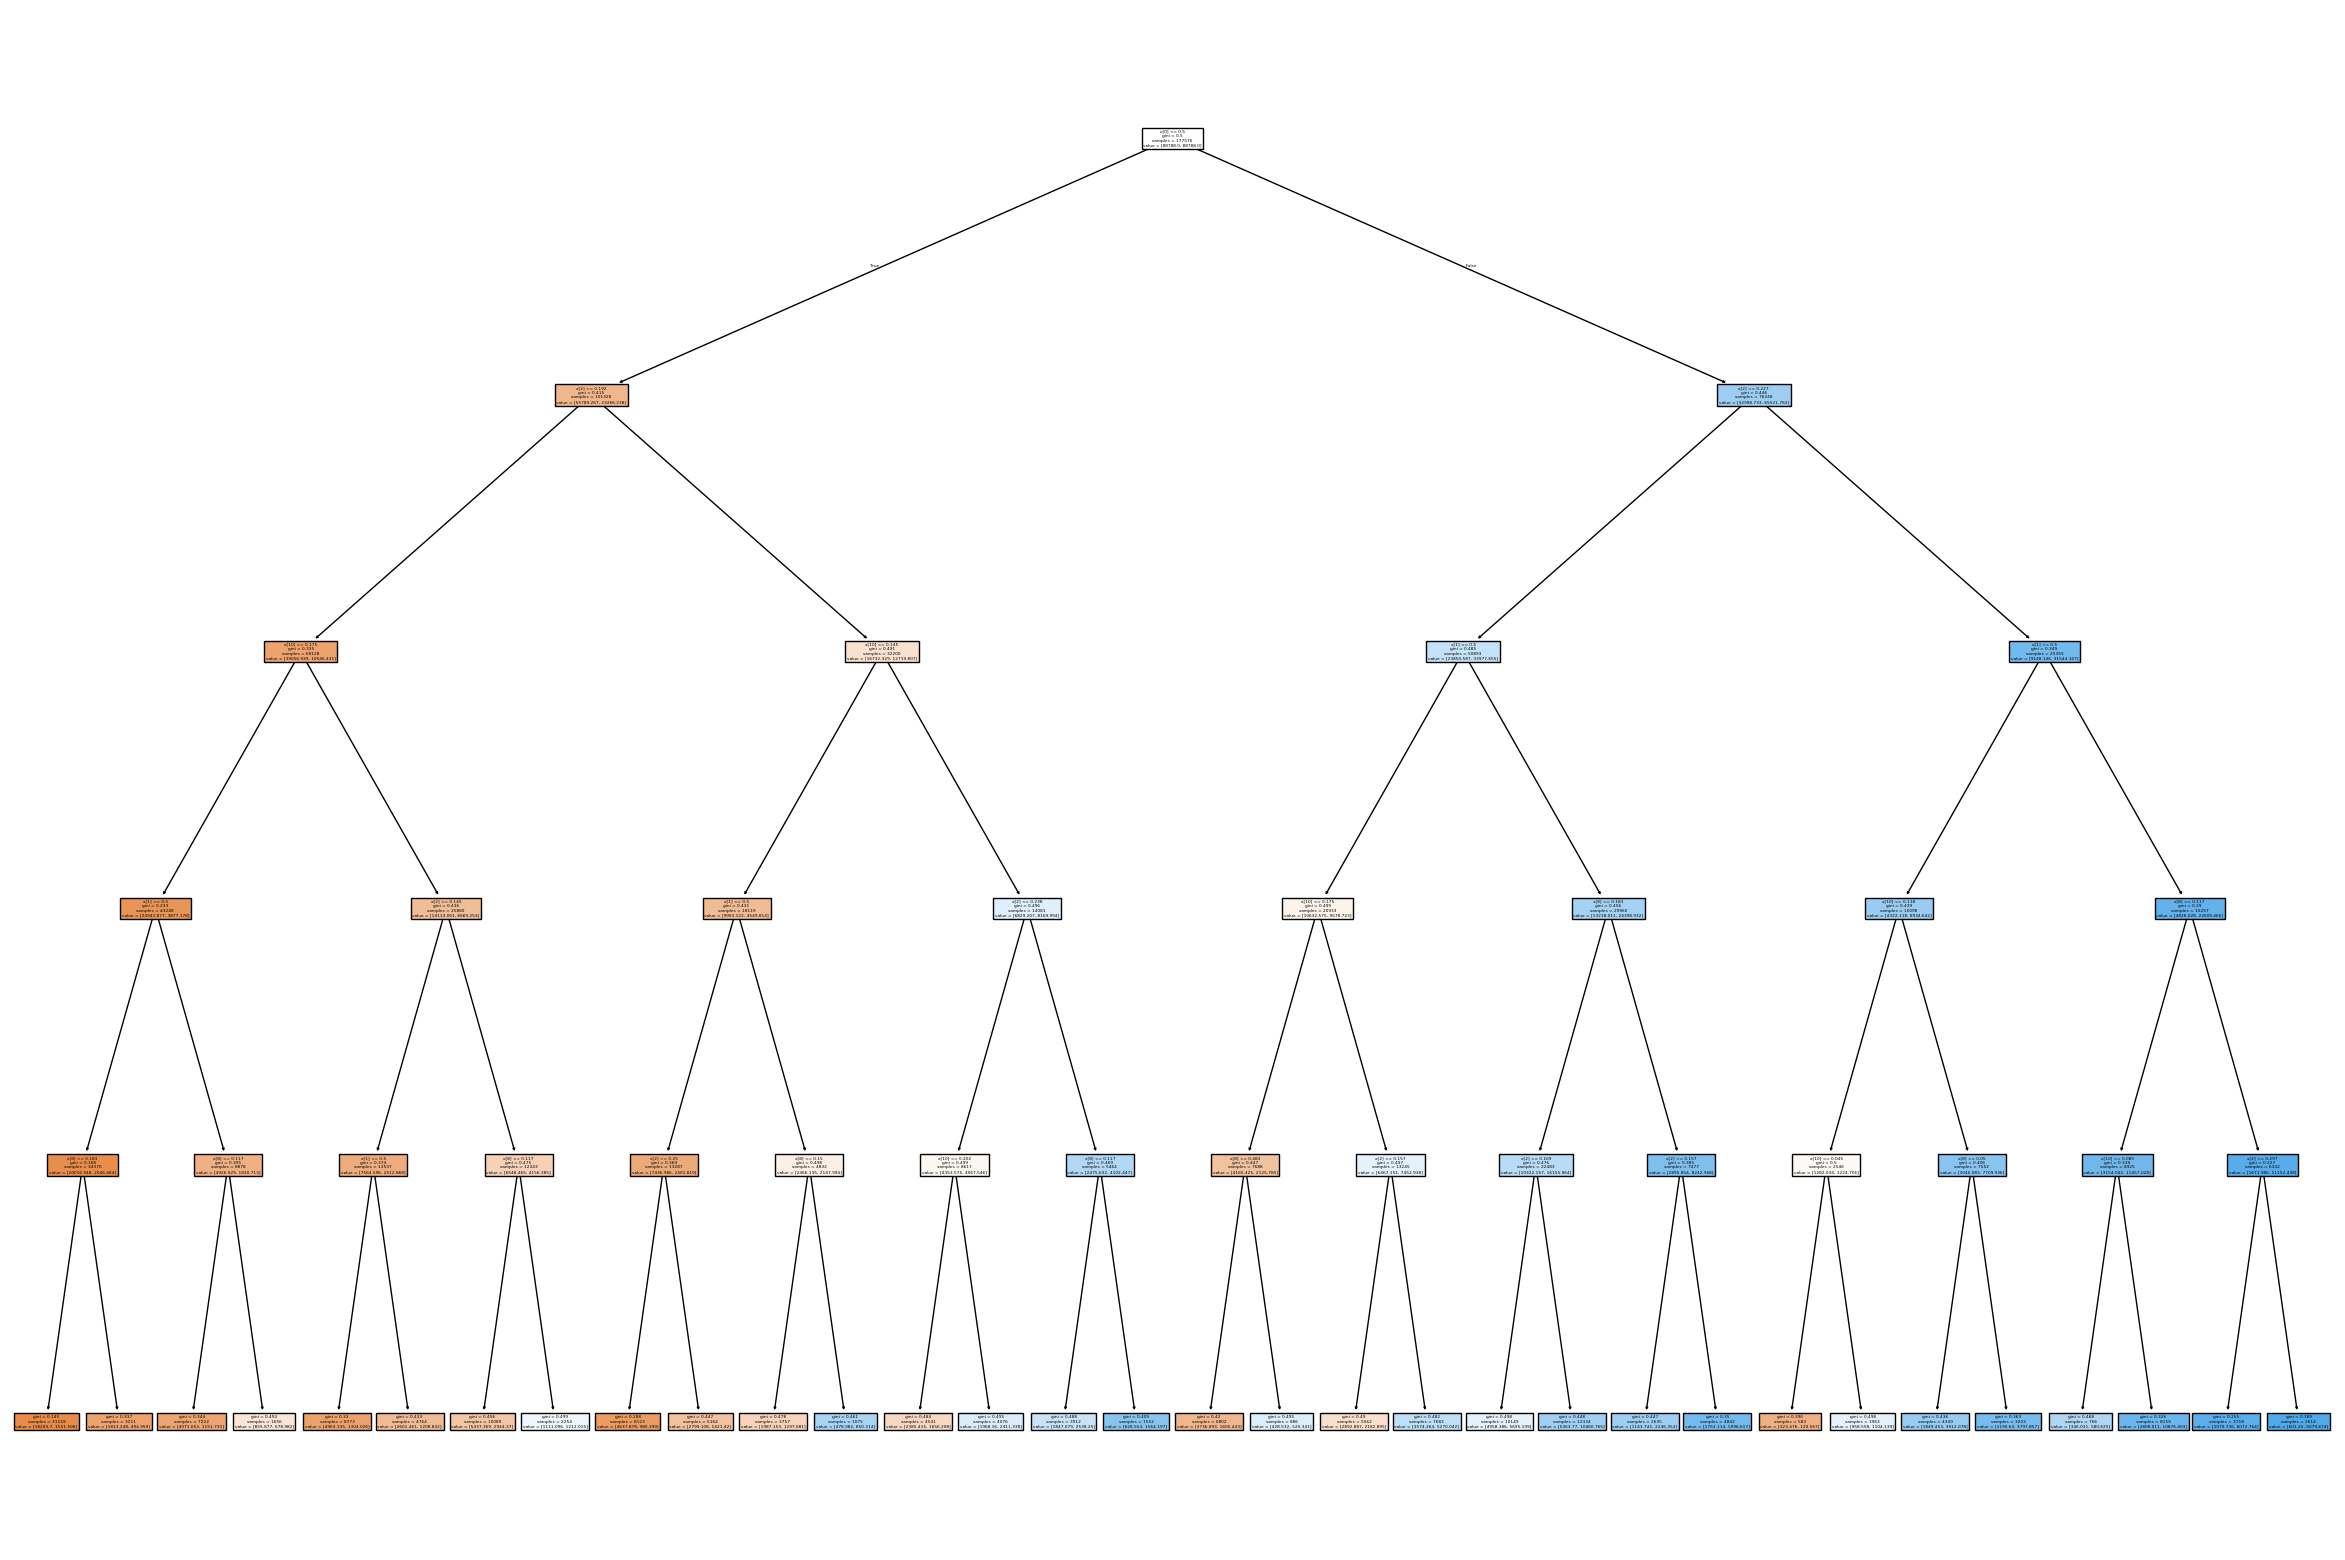

In [ ]:
# Train the DT
from sklearn.tree import DecisionTreeClassifier
treeClf = DecisionTreeClassifier(
    class_weight="balanced",
    max_depth=5,            # tree depth
    min_samples_split=10,   # samples to devide by
    min_samples_leaf=5,     # min samples in the leaves
    random_state=42
)

treeClf.fit(X_train, y_train)


# visualize
from sklearn import tree
plt.figure(figsize=(30, 20))
tree.plot_tree(treeClf, filled=True)
plt.show()



### ENTROPY

In [ ]:
from sklearn.tree import DecisionTreeClassifier
treeClf = DecisionTreeClassifier(
    criterion = 'entropy',
    class_weight="balanced",
    random_state = 0)

#training
treeClf.fit(X_train, y_train)


DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       random_state=0)

### EVALUATION

- **Precision answers**: "prediction, how many were correctly positive?"
- **Recall answers**: "real positives, how many did the model correctly identify?"
- **F1-score** harmonic mean of precision and recall, useful for imbalanced datasets.

In [ ]:
# matrix confussion
# predictions
y_pred = treeClf.predict(X_test)
print(y_pred)

#accuracy, f1score,precission
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix = \n', cm)
print('Classification report: \n', classification_report(y_test, y_pred))

#accuracy score
print("overall accuracy", accuracy_score(y_test, y_pred))


# balanced accuracy
tn, fp, fn, tp = cm.ravel()
balanced_acc = 0.5 * ((tp / (tp + fn)) + (tn / (tn + fp)))
print("Balanced Accuracy:", balanced_acc)

[0 1 0 ... 0 0 1]
Confusion matrix = 
 [[49693 14418]
 [ 6524  5469]]
Classification report: 
               precision    recall  f1-score   support

           0       0.88      0.78      0.83     64111
           1       0.28      0.46      0.34     11993

    accuracy                           0.72     76104
   macro avg       0.58      0.62      0.58     76104
weighted avg       0.79      0.72      0.75     76104

overall accuracy 0.724823925155051
Balanced Accuracy: 0.6155624025106345


ROC

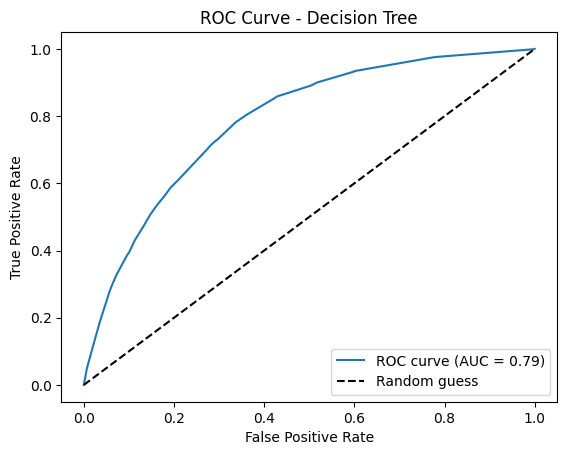

In [ ]:
#evaluate with ROC
y_pred_prob = treeClf.predict_proba(X_test)[:,1]
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
# graph
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.show()
from sklearn.metrics import confusion_matrix, classification_report

# **RANDOM FOREST**

split of the dataset

In [ ]:
from sklearn.model_selection import train_test_split
#stratification
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,stratify = y, random_state=42)


print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")





X_train: (202944, 11), X_test: (50736, 11)
y_train: (202944,), y_test: (50736,)


INSTANCE OF THE RF

In [ ]:

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(
    #n_estimators=100,
    n_estimators=200,
    max_depth=10,
    min_samples_leaf=10,
    class_weight='balanced',
    criterion = 'entropy',
    random_state=42
)


### NORMAL TRAINING OF THE **RF**

In [ ]:


rf_clf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_leaf=10, n_estimators=200,
                       random_state=42)

### undersampling train

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
# Instance undersampler
rus = RandomUnderSampler(random_state=42) #deletes random samples of the mayority class

# Apply
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

#
print("Distribution of training after undersampling:")
print(y_train_resampled.value_counts())
print("shape del train set after undersampling",X_train_resampled.shape)

rf_clf.fit(X_train_resampled, y_train_resampled)


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, min_samples_leaf=10, n_estimators=200,
                       random_state=42)

### EVALUATE AND PREDICTIONS

In [ ]:
y_pred = rf_clf.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
print("RANDOM FOREST CLASSIFIER")
cm = confusion_matrix(y_test,y_pred)
print('Confusion matrix = \n', cm)
print('Classification report: \n', classification_report(y_test,y_pred))
#accuracy score
print("overall accuracy", accuracy_score(y_test, y_pred))
# Balanced Accuracy
tn, fp, fn, tp = cm.ravel()
balanced_acc = 0.5 * ((tp / (tp + fn)) + (tn / (tn + fp)))
print("Balanced Accuracy:", balanced_acc)


RANDOM FOREST CLASSIFIER
Confusion matrix = 
 [[32540 13417]
 [ 1062  3717]]
Classification report: 
               precision    recall  f1-score   support

           0       0.97      0.71      0.82     45957
           1       0.22      0.78      0.34      4779

    accuracy                           0.71     50736
   macro avg       0.59      0.74      0.58     50736
weighted avg       0.90      0.71      0.77     50736

overall accuracy 0.7146207820876695
Balanced Accuracy: 0.7429154789622183


# MLP-CLASSIFIER NEURAL NETWORK

## BINARY CLASSSIFIER

we start with the read of the dataset again.

In [ ]:
df = pd.read_csv('Dataset1.csv')
df.head()
#ejecutar para multiclass y bi classif

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


PREPROCESSING

You dont have to execute the preprocessing cel codes for the selected disease.

**Make sure now you only execute the code cell for the target disease you want**

In [ ]:
#stroke
target = 'Stroke'

In [ ]:
#Heart disease
target = 'HartDisesaseorAttack'

In [ ]:
#diabetes
target = 'Diabetes'

In [ ]:
# average of target for each age category
age_target_encoding = df.groupby('Age')[target].mean()
# Mape values
df['Age'] = df['Age'].map(age_target_encoding)
df.dropna(inplace=True)

#BMI normalize
from sklearn.preprocessing import MinMaxScaler
standard = MinMaxScaler()
#df['BMI'] = standard.fit_transform(df[['BMI']])
df['BMI'] =(df['BMI'] - min(df['BMI']))/(max(df['BMI']) - min(df['BMI']))

#Ment and Phys Hlth normalizar
df['MentHlth'] = standard.fit_transform(df[['MentHlth']])
df['PhysHlth'] = standard.fit_transform(df[['PhysHlth']])

print(f"Dataset: {df.shape}")
df.head()


Dataset: (253680, 22)


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,0.325581,1,0,0,0,0,...,1,0,5,0.6,0.5,1,0,0.042534,4,3
1,0,0,0,0,0.151163,1,0,0,1,0,...,0,1,3,0.0,0.0,0,0,0.027438,6,1
2,0,1,1,1,0.186047,0,0,0,0,1,...,1,1,5,1.0,1.0,1,0,0.042534,4,8
3,0,1,0,1,0.174419,0,0,0,1,1,...,1,0,2,0.0,0.0,0,0,0.066162,3,6
4,0,1,1,1,0.139535,0,0,0,1,1,...,1,0,2,0.1,0.0,0,0,0.066162,5,4


In [ ]:
#split of the inputs and output

selected_features_diabetes = ['HighBP',	'HighChol',	'CholCheck'	,'BMI',	'Smoker',	'PhysActivity',	'Fruits',	'Veggies','HvyAlcoholConsump','PhysHlth',	'Sex','Age']
X = df[selected_features_diabetes]
y = df[target]
print(X)
print(y)
n_inputs = X.shape[1]
n_outputs = len(y.value_counts())
print(f"Number of input features = {n_inputs}")
print(f"Number of output targets = {n_outputs}")

        HighBP  HighChol  CholCheck       BMI  Smoker  PhysActivity  Fruits  \
0            1         1          1  0.325581       1             0       0   
1            0         0          0  0.151163       1             1       0   
2            1         1          1  0.186047       0             0       1   
3            1         0          1  0.174419       0             1       1   
4            1         1          1  0.139535       0             1       1   
...        ...       ...        ...       ...     ...           ...     ...   
253675       1         1          1  0.383721       0             0       1   
253676       1         1          1  0.069767       0             0       0   
253677       0         0          1  0.186047       0             1       1   
253678       1         0          1  0.127907       0             0       1   
253679       1         1          1  0.151163       0             1       1   

        Veggies  HvyAlcoholConsump  PhysHlth  Sex  

In [ ]:
#split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Size of training features : ", X_train.shape)
print("Size of training targets : ", y_train.shape)
print("Size of test features : ", X_test.shape)
print("Size of test targets : ", y_test.shape)

Size of training features :  (177576, 12)
Size of training targets :  (177576,)
Size of test features :  (76104, 12)
Size of test targets :  (76104,)


In [ ]:
#import MLP cassif

from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(hidden_layer_sizes=(200,100), max_iter = 200, activation = 'relu', solver = 'sgd', learning_rate='constant', learning_rate_init=0.001, batch_size='auto', tol=0.00001, verbose=True)
print(mlp_classifier)



MLPClassifier(hidden_layer_sizes=(200, 100), solver='sgd', tol=1e-05,
              verbose=True)
Iteration 1, loss = 0.20275659
Iteration 2, loss = 0.16392291
Iteration 3, loss = 0.15971475
Iteration 4, loss = 0.15723687
Iteration 5, loss = 0.15576464
Iteration 6, loss = 0.15486721
Iteration 7, loss = 0.15427474
Iteration 8, loss = 0.15387236
Iteration 9, loss = 0.15357803
Iteration 10, loss = 0.15336349
Iteration 11, loss = 0.15320392
Iteration 12, loss = 0.15307177
Iteration 13, loss = 0.15297167
Iteration 14, loss = 0.15287504
Iteration 15, loss = 0.15279036
Iteration 16, loss = 0.15272244
Iteration 17, loss = 0.15265652
Iteration 18, loss = 0.15259718
Iteration 19, loss = 0.15254329
Iteration 20, loss = 0.15248332
Iteration 21, loss = 0.15244166
Iteration 22, loss = 0.15239543
Iteration 23, loss = 0.15235144
Iteration 24, loss = 0.15230263
Iteration 25, loss = 0.15226947
Iteration 26, loss = 0.15223534
Iteration 27, loss = 0.15220371
Iteration 28, loss = 0.15217298
Iteration 29, l

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Train MLP **without** undersampling

In [ ]:
mlp_classifier.fit(X_train, y_train)
print(f"MLP classifer weights = {mlp_classifier.coefs_}")

### Train MLP with undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)


X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

# size after undersampling
print("Distribution of training after undersampling::")
print(y_train_resampled.value_counts())
print("shape del train set after undersampling",X_train_resampled.shape)

mlp_classifier.fit(X_train_resampled, y_train_resampled)
#print(f"MLP classifer weights = {mlp_classifier.coefs_}")

Distribución de clases después del undersampling en entrenamiento:
Stroke
0    7195
1    7195
Name: count, dtype: int64
shape del train set after undersampling (14390, 12)
Iteration 1, loss = 0.69491890
Iteration 2, loss = 0.67596592
Iteration 3, loss = 0.66174225
Iteration 4, loss = 0.64969027
Iteration 5, loss = 0.63923123
Iteration 6, loss = 0.63016801
Iteration 7, loss = 0.62267772
Iteration 8, loss = 0.61642327
Iteration 9, loss = 0.61155045
Iteration 10, loss = 0.60779317
Iteration 11, loss = 0.60489119
Iteration 12, loss = 0.60269520
Iteration 13, loss = 0.60100729
Iteration 14, loss = 0.59968316
Iteration 15, loss = 0.59878164
Iteration 16, loss = 0.59785622
Iteration 17, loss = 0.59716574
Iteration 18, loss = 0.59669569
Iteration 19, loss = 0.59613307
Iteration 20, loss = 0.59571507
Iteration 21, loss = 0.59535604
Iteration 22, loss = 0.59511259
Iteration 23, loss = 0.59475000
Iteration 24, loss = 0.59446983
Iteration 25, loss = 0.59423077
Iteration 26, loss = 0.59400283
Itera

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(200, 100), solver='sgd', tol=1e-05,
              verbose=True)

## Evaluation of the trained Model - MLP

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = mlp_classifier.predict(X_test)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

Accuracy: 0.66


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division = True))

[[47676 25331]
 [  776  2321]]
              precision    recall  f1-score   support

           0       0.98      0.65      0.79     73007
           1       0.08      0.75      0.15      3097

    accuracy                           0.66     76104
   macro avg       0.53      0.70      0.47     76104
weighted avg       0.95      0.66      0.76     76104

